In [58]:
import numpy as np  # noqa
import pandas as pd  # noqa
import seaborn as sns
from matplotlib import pyplot as plt

In [59]:
df = pd.read_csv("../data/diabetes.csv")
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [60]:
df.isna().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [61]:
df.shape

(768, 9)

In [62]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [64]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

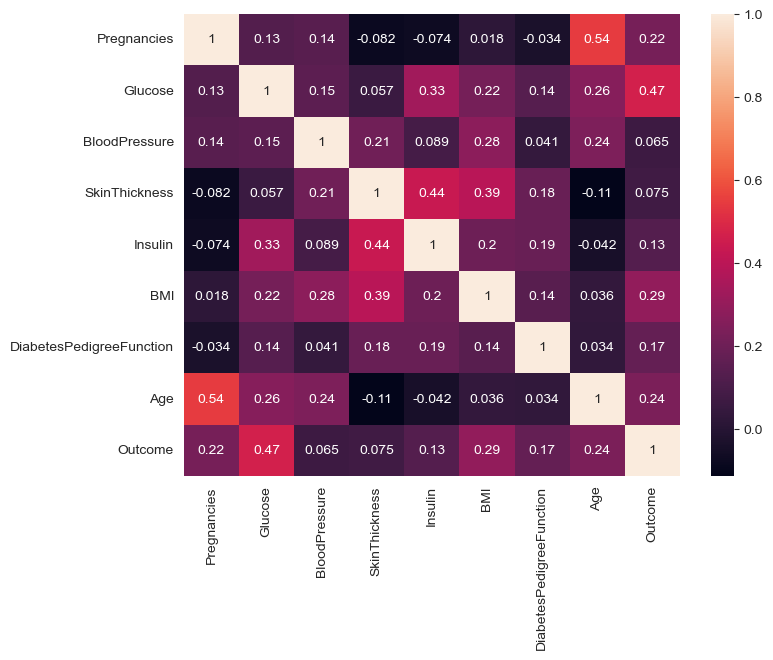

In [65]:
f, ax = plt.subplots(1, figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, ax=ax)

<Axes: xlabel='Outcome', ylabel='count'>

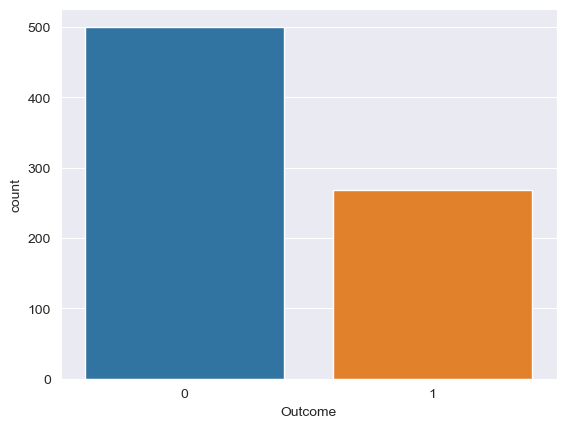

In [66]:
sns.countplot(x=df.Outcome)

In [67]:
column_names = df.columns
column_names = column_names.drop("Outcome")
for name in column_names:
    print("{}\n".format(name))
    print(df.groupby(["Outcome"])[name].mean())
    print("*" * 50)
    print()

Pregnancies

Outcome
0    3.298000
1    4.865672
Name: Pregnancies, dtype: float64
**************************************************

Glucose

Outcome
0    109.980000
1    141.257463
Name: Glucose, dtype: float64
**************************************************

BloodPressure

Outcome
0    68.184000
1    70.824627
Name: BloodPressure, dtype: float64
**************************************************

SkinThickness

Outcome
0    19.664000
1    22.164179
Name: SkinThickness, dtype: float64
**************************************************

Insulin

Outcome
0     68.792000
1    100.335821
Name: Insulin, dtype: float64
**************************************************

BMI

Outcome
0    30.304200
1    35.142537
Name: BMI, dtype: float64
**************************************************

DiabetesPedigreeFunction

Outcome
0    0.429734
1    0.550500
Name: DiabetesPedigreeFunction, dtype: float64
**************************************************

Age

Outcome
0    31.190000
1    37.067

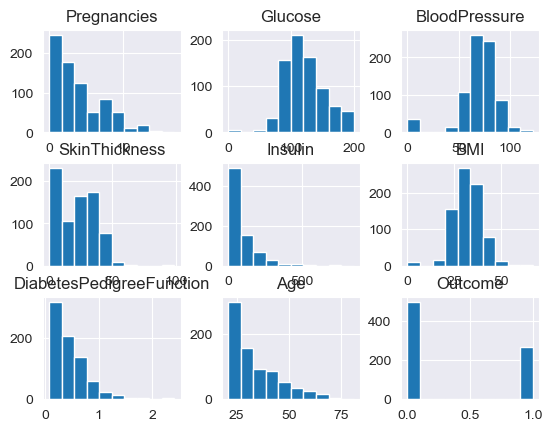

In [68]:
df.hist()
plt.show()

# Data separation

In [69]:
X = df.iloc[:, 0:8]
y = df.iloc[:, 8]

In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# LogisticRegression

In [71]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression(max_iter=1000)
reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [72]:
y_pred = reg.predict(X_test)

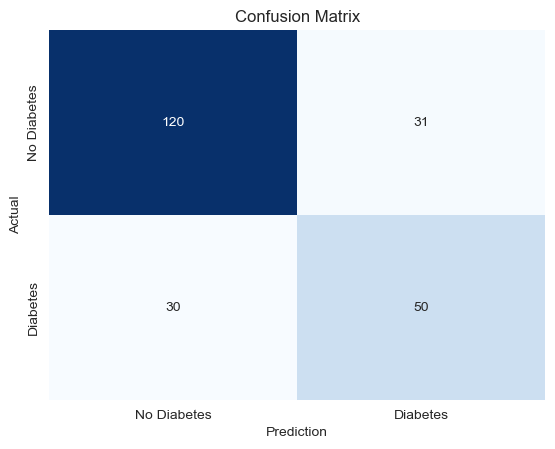

<Figure size 640x480 with 0 Axes>

In [73]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

ax = sns.heatmap(
    cnf_matrix,
    annot=True,
    xticklabels=["No Diabetes", "Diabetes"],
    yticklabels=["No Diabetes", "Diabetes"],
    cbar=False,
    cmap="Blues",
    fmt=".6g",
)
plt.title("Confusion Matrix")
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")
plt.show()
plt.clf()

In [74]:
print("Accuracy : ", metrics.accuracy_score(y_test, y_pred))

Accuracy :  0.7359307359307359


# Save model

In [75]:
from pathlib import Path
import pickle

Path("../models").mkdir(exist_ok=True)
pickle.dump(reg, open("../models/logistic_reg_1000.sav", "wb"))

# Use case

In [76]:
data = [[6, 148, 72, 35, 0, 33.6, 0.627, 50], [1, 85, 66, 29, 0, 26.6, 0.351, 31]]

df = pd.DataFrame(
    data,
    columns=[
        "Pregnancies",
        "Glucose",
        "BloodPressure",
        "SkinThickness",
        "Insulin",
        "BMI",
        "DiabetesPedigreeFunction",
        "Age",
    ],
)

pred = reg.predict(df)
print('data', data, '\npred', pred)

data [[6, 148, 72, 35, 0, 33.6, 0.627, 50], [1, 85, 66, 29, 0, 26.6, 0.351, 31]] 
pred [1 0]
